Diego Lozoya Morales 745345

24/08/23

Actividad 2 Sympy

# Ejercicios de optimización escalar

**Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.**

$f(x)=1260+117x-9x^2$

In [1]:
import sympy as sp
import numpy as np


sp.var("x")

def f(x):
    return 1260 + 117*x - 9*x**2

df = sp.diff(f(x), x)
pc = sp.solve(df, x)
pc

[13/2]

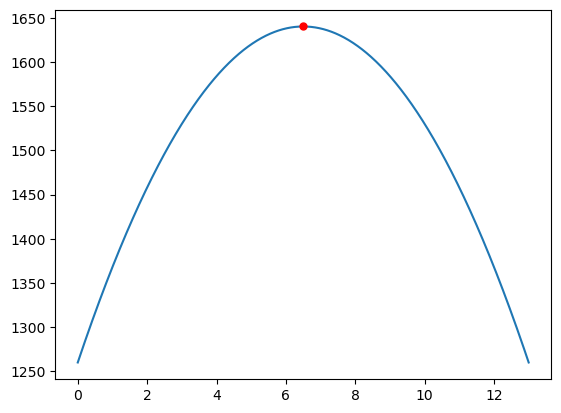

In [9]:
xn = np.linspace(0, 13, 1000)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
plt.plot(xn, f(xn))
for c in pc:
    plt.plot(c, f(c), ".r", ms=10)

La función tiene 1 punto crítico en 6.5 y es un máximo global

$f(x)=5+x+\frac{4}{x}$, para $x>0$

In [10]:
def g(x):
    return 5 + x + 4/x

gf = sp.diff(g(x), x)
pc = sp.solve(gf, x)
pc

[-2, 2]

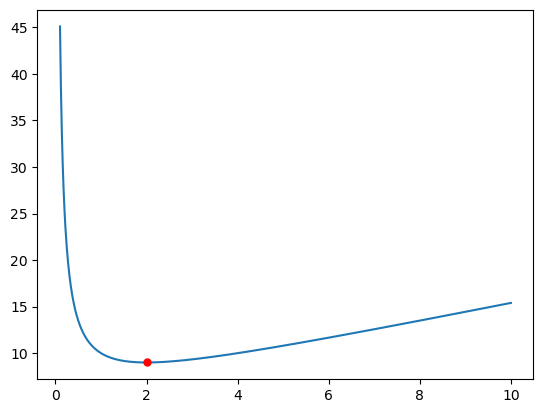

In [19]:
xn = np.linspace(0.1, 10, 1000)

plt.figure()
plt.plot(xn, g(xn))
plt.plot(pc[1], g(pc[1]), ".r", ms=10)

La función tiene 1 punto crítico en x>0 y es 2, por lo tanto es un mínimo global

$f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [24]:
def h(x):
    return 6 - 2*x + (18 - 2*x**2)**(1/2)

hf = sp.diff(h(x), x)
pc = sp.solve(hf, x)
pc

[-2.44948974278318]

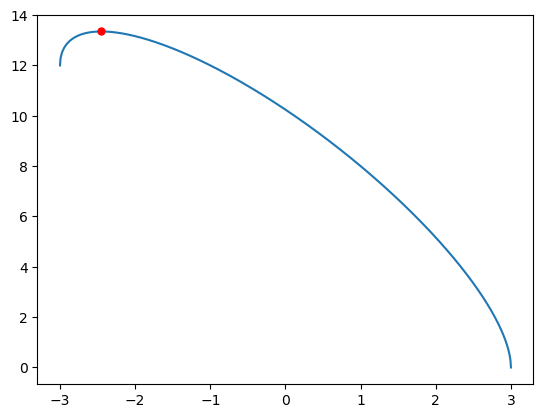

In [25]:
xn = np.linspace(-3, 3, 1000)

plt.figure()
plt.plot(xn, h(xn))
plt.plot(pc[0], h(pc[0]), ".r", ms=10)

La función tiene 1 punto crítico en -2.45 y es un máximo global

$f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

---
**Resuelva los siguientes problemas usando la librería `SymPy`. Use celdas en `Markdown` para explicar su procedimiento.**

El perímetro de un triángulo isósceles es de $10 cm$. ¿Cuánto deben medir sus lados para que el volumen del cuerpo generado por la rotación del triángulo en torno a su base sea el mayor posible? (Volumen de un cono $= \frac{1}{3}\pi r^2 h$, donde $r$ es el radio de la base y $h$ la altura del cono).

Disponemos de una barra de aluminio de 6 metros para construir una portería de fútbol. Si queremos que el área de la portería sea máxima, ¿cuánto deben medir los postes y el travesaño?